In [ ]:
# 와인 데이터 분류 모델

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout

# 모델 생성 
model = Sequential()

# 모델 구성

## 입력층 (4개 변수)
model.add(Input(shape=(11,)))        

## 은닉층
model.add(Dense(100, activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(200, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(50, activation="tanh"))
model.add(Dropout(0.1))

## 출력층 (10개의 분류)
model.add(Dense(10, activation="softmax"))

2025-09-11 23:02:47.682665: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-09-11 23:02:47.682687: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-09-11 23:02:47.682690: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-09-11 23:02:47.682701: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-11 23:02:47.682711: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# CSV 데이터 로딩
redwine = pd.read_csv('winequality-red.csv', sep=';')
X, y = redwine.iloc[:, :-1], redwine.iloc[:, -1]

# 학습용, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 학습용 데이터 출력 (2차원 배열)
#print(X_train.to_numpy())

[[ 6.9   0.45  0.11 ...  3.3   0.65 11.4 ]
 [10.6   0.42  0.48 ...  3.21  0.87 11.3 ]
 [13.5   0.53  0.79 ...  3.18  0.77 13.  ]
 ...
 [ 6.7   0.48  0.02 ...  3.1   0.53  9.7 ]
 [10.4   0.24  0.46 ...  3.25  1.02 10.8 ]
 [11.3   0.37  0.41 ...  3.09  0.8   9.3 ]]


In [3]:
# 훈련 정의
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, batch_size=200, epochs=300)

# 모델 평가
model.evaluate(X_test, y_test)

Epoch 1/300


2025-09-11 23:02:48.078479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3144 - loss: 1.8550
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4229 - loss: 1.3864
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4412 - loss: 1.3003
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4345 - loss: 1.3027
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4445 - loss: 1.2724
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4595 - loss: 1.2409
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4729 - loss: 1.2284
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4487 - loss: 1.2459
Epoch 9/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4570 - loss: 1.2195
Epoch 10/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4595 - loss: 1.2170
Epoch 11/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4846 - loss: 1.1945
Epoch 12/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4737 - loss: 1.2000
E

[0.9657914042472839, 0.5899999737739563]

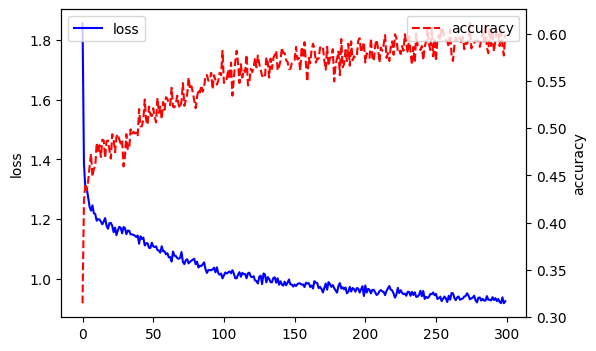

In [4]:
# 시각화 
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.plot(history.history['loss'], 'b-', label='loss')
ax1.set_ylabel('loss')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(history.history['accuracy'], 'r--', label='accuracy')
ax2.set_ylabel('accuracy')
ax2.legend(loc='upper right')
plt.show()